In [7]:
!pip install pandas

In [1]:
import pandas as pd
import numpy as np
# import seaborn as sn
import matplotlib as plt
import PIL
from PIL import Image
from matplotlib import image
import os
import shutil
from matplotlib import image
from matplotlib import pyplot
import random
import shutil
from pathlib import Path
import glob
import shutil
import os
from pathlib import Path

import tensorflow as tf

In [2]:
from keras.preprocessing.image import ImageDataGenerator


ModuleNotFoundError: No module named 'keras'

In [3]:
import tensorflow as tf

In [2]:
random.seed(1)

datadir = 'archive/train/'

In [4]:
# Randomly shuffuling the the data

metadataset = pd.read_csv("archive/train_annotations.csv")
metadataset = metadataset.sample(frac=1, random_state=1).reset_index(drop=True)

In [6]:
# Dividing the image data into sub-folders of classes- Test / train and with 25% of test data 

for i in range(metadataset.shape[0]):
    if i < metadataset.shape[0] * 0.75:
        category = "train"
    else:
        category = "test"
    if metadataset.iloc[i,5] == 0:
        target = "Negative"
    else:
        target = "Positive"
    dst_dir = f'{os.getcwd()}/Image_Data/{category}/{target}/'
    Path(dst_dir).mkdir(parents=True, exist_ok=True)
    shutil.copy(f'{os.getcwd()}/archive/train/{metadataset.iloc[i,9]}', dst_dir)

(25, 25)


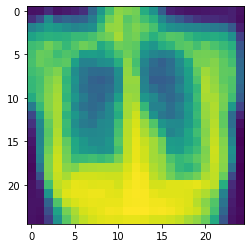

In [7]:
# load image as pixel array
data = image.imread('archive/train/a44afa4fa73d/403614c1f263/6489245ff976.jpg')
data = Image.fromarray(data).resize((25,25))
# summarize shape of the pixel array
print(data.size)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

In [21]:
# 10 flod cross valiation

from sklearn.model_selection import KFold
kfold = KFold(2, True, 1)

# enumerate splits
for train, test in kfold.split(X):
	print('train: %s, test: %s' % (X[train], X[test]))
   

train:        7      8      10     12     14     15     20     21     22     24   \
0    125.0  134.0  145.0  130.0   91.0   82.0   48.0   31.0   24.0   43.0   
1     16.0   42.0  108.0  184.0  182.0  117.0   13.0   14.0   16.0   18.0   
2    106.0  113.0  160.0  200.0  200.0  171.0   81.0   77.0   62.0   26.0   
3      7.0   84.0  159.0  154.0   84.0    8.0    3.0    2.0    2.0    2.0   
4     57.0   70.0   93.0   97.0   86.0   75.0   54.0   54.0   55.0   56.0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
595   15.0   24.0  114.0  179.0  176.0  156.0   98.0  121.0  108.0   85.0   
596    0.0    0.0    0.0    0.0    0.0    0.0   10.0   11.0   12.0    9.0   
597   37.0   21.0    3.0  168.0  168.0  181.0    1.0    3.0    3.0    3.0   
598  124.0  162.0  182.0  182.0  185.0  182.0  187.0  195.0  200.0  197.0   
599  139.0  140.0  138.0  130.0  118.0  116.0  126.0  129.0  131.0   80.0   

     ...    584    586    587    589    590    593    594    596    

/Users/shreyasarunesh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [24]:
X[train].head

<bound method NDFrame.head of        0     1     2      3      4      5      6      9      11     13   ...  \
0     26.0  26.0  26.0   24.0   20.0   10.0   50.0  148.0  143.0  118.0  ...   
1     10.0  10.0   9.0    8.0    7.0    5.0    5.0   62.0  143.0  181.0  ...   
2     28.0  26.0  39.0   68.0   86.0   92.0   98.0  132.0  176.0  207.0  ...   
3     34.0  15.0   2.0    3.0    0.0   13.0   19.0  143.0  142.0  119.0  ...   
4     59.0  57.0  55.0   54.0   55.0   55.0   55.0   84.0   99.0   97.0  ...   
..     ...   ...   ...    ...    ...    ...    ...    ...    ...    ...  ...   
595   18.0  32.0  23.0   10.0    1.0    1.0    5.0   51.0  145.0  170.0  ...   
596    0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
597  132.0   5.0   1.0    4.0   35.0   36.0   36.0    1.0  101.0  183.0  ...   
598   46.0  30.0  26.0   69.0   88.0   86.0   85.0  174.0  188.0  194.0  ...   
599   17.0  16.0  22.0  112.0  135.0  139.0  138.0  140.0  135.0  126.0  ...   

       56

In [23]:
X[test].shape

(600, 300)